# Capstone III 

## Stroke Risk, Statistical Analysis Using Python
Statistical correlations will be explored using data found on [Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset). This is one file dataset contains 5110 observations with 12 attributes.
The aim for this analysis will be to find correlations between reported stroke factors that could potentially be used by patients or medical professionals to mitigate risk.

***If needed, please download file provided through link and connect to Google Colab.***




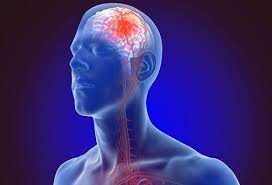

## Why it is important to study stroke risk factors

According to the CDC, in 2020, 1 in 6 deaths from cardiovascular disease was due to stroke. Every 40 seconds, someone in the United States has a stroke. Every 3.5 minutes, someone dies of stroke. Every year, more than 795,000 people in the United States have a stroke.

High blood pressure, high cholesterol, smoking, obesity, and diabetes are leading causes of stroke. One in 3 U.S. adults has at least one of these conditions or habits.

Stroke is a leading cause of death for Americans


There are two questions that will be addressed in this analysis:

1.  Is there statistical correlation between average glucose levels and having a stroke?

2.  Is there a statistical correlation patient BMI and having a stroke?


# Hypotheses

# Hypothesis #1
## There is no statistical correlation between average glucose levels and having a stroke.
I will conduct a Pearson R test to find a statistical correlation between patient average blood sugar levels and stroke prevalence.

# Hypothesis #2
## There is no correlation between patient BMI and stroke prevalence.
I will conduct a Pearson R test to find a correlation between the patient's BMI and whether they have had a stroke.

## How will the data test the hypotheses?
The Pearson test will be used to reveal a correlation between average glucose levels and stroke prevalence.

The Pearson test will be used to reveal a correlation between BMI and stroke prevalence.


## How could these findings be useful?

It could potentially benefit patients and medial professionals in the following ways:
Should patients with high average glucose levels be more concerned about having a stroke than patient with lower averages?

Is there a link between BMI and having a stroke?

This information could be useful in recognizing whether patients who have a high glucose levels, or a higher BMI need to be more aware of stroke signs and preventative measures as they are more statistically more likely than other patients to experience one.


## Linking the Data
I began by downloading the file from Kaggle and saving it into my Drive. Then, I imported that file into this Colab notebook for analysis.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from scipy.stats.stats import ttest_ind
import warnings

warnings.filterwarnings('ignore')

In [ ]:
stroke_df= pd.read_csv("/content/stroke-data.csv")

# Wrangling and Exploring the Data


## Data Attributes

1) id: unique identifier

2) gender: "Male", "Female" or "Other"


3) age: age of the patient


4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension


5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease


6) ever_married: "No" or "Yes"


7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"


8) Residence_type: "Rural" or "Urban"


9) avg_glucose_level: average glucose level in blood


10) bmi: body mass index


11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*


12) stroke: 1 if the patient had a stroke or 0 if not


*Note: "Unknown" in smoking_status means that the information is unavailable for this patient


In [ ]:
stroke_df.shape

(5110, 12)

In [ ]:
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
stroke_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
stroke_df.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
strk_df = stroke_df.dropna() 
stroke_df.drop_duplicates(['id'])

strk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [ ]:
strk_df.info

<bound method DataFrame.info of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
5     56669    Male  81.0             0              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5104  14180  Female  13.0             0              0           No   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban 

# Grouping and Sorting Data 

In [ ]:
strk_pts = strk_df.iloc[(strk_df['stroke'] == 1).values]
strk_pts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 248
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 209 non-null    int64  
 1   gender             209 non-null    object 
 2   age                209 non-null    float64
 3   hypertension       209 non-null    int64  
 4   heart_disease      209 non-null    int64  
 5   ever_married       209 non-null    object 
 6   work_type          209 non-null    object 
 7   Residence_type     209 non-null    object 
 8   avg_glucose_level  209 non-null    float64
 9   bmi                209 non-null    float64
 10  smoking_status     209 non-null    object 
 11  stroke             209 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 21.2+ KB


In [ ]:
female_pts = strk_df.iloc[(strk_df['gender'] == 'Female').values]
female_pts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2897 entries, 3 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2897 non-null   int64  
 1   gender             2897 non-null   object 
 2   age                2897 non-null   float64
 3   hypertension       2897 non-null   int64  
 4   heart_disease      2897 non-null   int64  
 5   ever_married       2897 non-null   object 
 6   work_type          2897 non-null   object 
 7   Residence_type     2897 non-null   object 
 8   avg_glucose_level  2897 non-null   float64
 9   bmi                2897 non-null   float64
 10  smoking_status     2897 non-null   object 
 11  stroke             2897 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 294.2+ KB


In [ ]:
male_pts = strk_df.iloc[(strk_df['gender'] == 'Male').values]
male_pts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2011 non-null   int64  
 1   gender             2011 non-null   object 
 2   age                2011 non-null   float64
 3   hypertension       2011 non-null   int64  
 4   heart_disease      2011 non-null   int64  
 5   ever_married       2011 non-null   int64  
 6   work_type          2011 non-null   object 
 7   Residence_type     2011 non-null   object 
 8   avg_glucose_level  2011 non-null   float64
 9   bmi                2011 non-null   float64
 10  smoking_status     2011 non-null   object 
 11  stroke             2011 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 204.2+ KB


In [ ]:
strk_df.groupby("stroke").mean()[["hypertension", "heart_disease", "ever_married", "avg_glucose_level", "bmi"]]

,hypertension,heart_disease,ever_married,avg_glucose_level,bmi
stroke,,,,,
0,0.083191,0.043191,0.642128,104.003736,28.823064
1,0.287081,0.191388,0.889952,134.571388,30.471292


In [ ]:
import seaborn as sns 
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from numpy.lib import stride_tricks
from scipy import stats
from scipy.stats import ttest_ind
stroke_pts = strk_df.loc[strk_df['stroke'] == 1]


In [ ]:
strk_df = strk_df.replace({'Yes': 1, 'No': 0})

# Visualizing and Testing

# Hypothesis #1
## There is no statistical correlation between the average glucose level and having a stroke.


Visualizing the data:

In [ ]:
strk_df.groupby("stroke").mean()[["avg_glucose_level"]]

,avg_glucose_level
stroke,
0,104.003736
1,134.571388


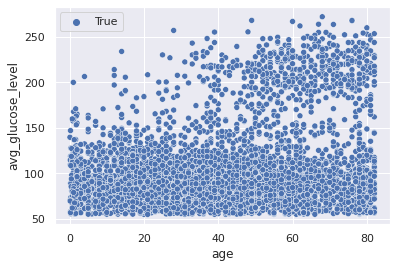

In [ ]:
sns.scatterplot(x='age', y='avg_glucose_level', hue= 'stroke' !=0, data=strk_df)

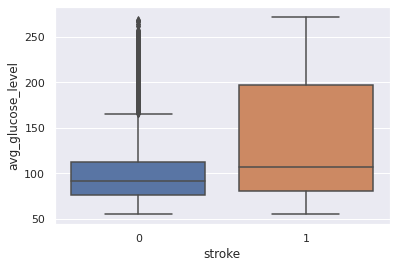

In [ ]:
sns.boxplot(y="avg_glucose_level", x="stroke", data=strk_df)

Testng the data:

In [ ]:
glucose_stroke = stats.pearsonr(strk_df['avg_glucose_level'], strk_df['stroke'])
print(glucose_stroke)

(0.13893586200507024, 1.3799691107352921e-22)


## Findings
As the correlation coefficient is >0 and the p-value is <0.05, we reject the null hypothesis that there is no statistical correlation between patient average glucose levels and prevalence of stroke and conclude that a correlation does exist.
## Recommendations:
It is recommended that patients with average glucose levels above 110 be made aware of signs of stroke in order to identify and secure care as quickly as possible in efforts to mitigate the effects.


# Hypothesis # 2
## There is no statistical correlation between patient BMI and stroke prevalence.


Visualizing the data:

In [ ]:
strk_df.groupby("stroke").mean()[["bmi"]]

,bmi
stroke,
0,28.823064
1,30.471292


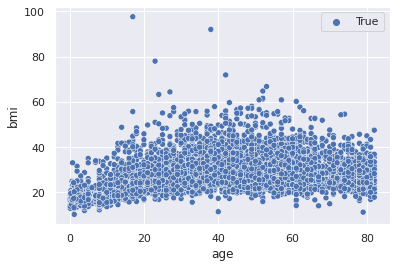

In [ ]:
sns.scatterplot(x='age', y='bmi', hue= 'stroke' !=0, data=strk_df)

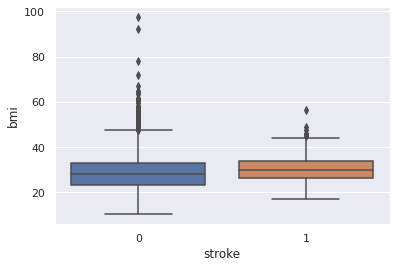

In [ ]:
sns.boxplot(y="bmi", x="stroke", data=strk_df)

Testing the data:

In [ ]:
bmi_stroke = stats.pearsonr(strk_df['bmi'], strk_df['stroke'])
print(bmi_stroke)

(0.042373661149233556, 0.002983269099763048)


## Findings
As the correlation coefficient is >0 and the p-value is <0.05, we reject the null hypothesis that there is no statistical correlation between patient BMI and prevalence of stroke and conclude that a weak correlation does exist. 

## Recommendations:
As the correlation is weak, further testing is recommended to further explore this correlation so that a specific BMI threshold can be identified to predict and prevent strokes for patients with higher BMIs. We can recommend that patients with BMIs above 30 are made aware of the signs and effects of having a stroke so they can make efforts to prevent them as well as to secure medical attention at early onset of symptoms.